## Ⅰ. Gradient Descent

### 1. 단변수 함수에서의 Gradient Descent

함수의 기울기 정보를 이용하여 최솟값을 탐색하는 알고리즘이다. 이는 Convex한 함수에서 항상 최소점을 찾을 수 있음이 보장되어 있다.  
$f(x) = x^2$ 을 예시로 들어보자. 이 함수의 x에서의 기울기는 다음과 같이 수치적으로 계산할 수 있다.

$$
\frac{df(x)}{dx} =  \lim_{h \rightarrow 0}\frac{f(x + h) - f(x)}{h}
$$

경사하강법은 이 기울기값을 바탕으로 x를 다음과 같이 갱신한다.

$$
x \leftarrow x - \lambda f'(x)
$$

여기서 $\lambda$ learning rate이라고 하며 기울기의 정보를 얼마나 반영할지에 대한 파라미터이다. 경사하강법을 그림으로 표현하자면 다음과 같이 움직인다. 기울기가 작아질수록 x가 움직이는 폭이 줄어들어 충분한 iteration을 거치면 최소값으로 수렴하게 된다. 

<img src='img/gradient_descent.png' width=40% />

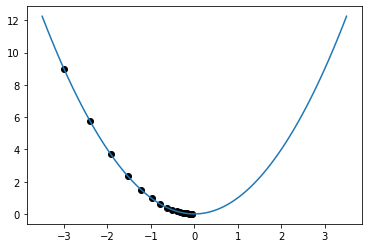

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2

def df(x):
    h = 1e-6
    return (f(x+h) - f(x)) / h

# gradient descent algorithm

x = -3
lr = 1e-1
epsilon = 1e-1

grad = df(x)
history_x = [x]
history_y= [f(x)]
while abs(grad) > epsilon:
    x -= lr*grad
    grad = df(x)
    history_x.append(x)
    history_y.append(f(x))

x_domain = np.linspace(-3.5, 3.5, 100)
plt.plot(x_domain, f(x_domain))
plt.scatter(history_x, history_y, c='black')
plt.show()

### 2. 다변수함수에서의 Gradient Descent

위의 경우의 파라미터가 하나였지만 알고리즘은 다변수의 함수에도 적용할 수 있다. 이때 기울기를 구할때 편미분을 사용하면 될 것이다.

$$
\nabla f(\mathbf{x}) = \left( \frac{\partial f(x_1)}{\partial \mathbf{\,x_1}},
\frac{\partial f(x_2)}{\partial \mathbf{\,x_2}}, \dots, \frac{\partial f(x_n)}{\partial \mathbf{\,x_n}} \right)
$$

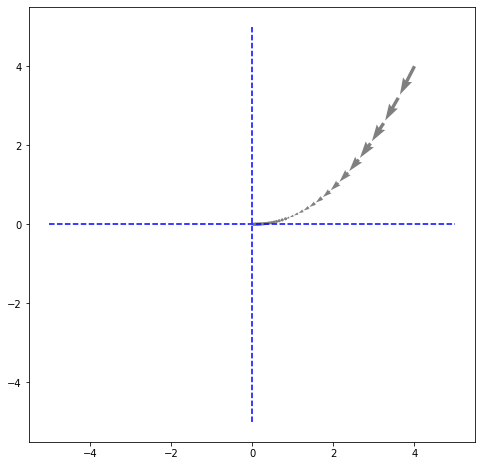

In [2]:
def f(x):
    return np.sum(np.array([1, 2]) * x**2)

def df(x):
    return np.array([[2, 0], [0, 4]]) @ x

# multivariate gradient descent algorithm

x = np.array([4.0, 4.0])
lr = 5e-2
epsilon = 1e-1

grad = df(x)
history_coor = [x]
history_grad = [-grad]

while np.linalg.norm(grad) > epsilon:
    x = x - lr*grad
    grad = df(x)
    history_coor.append(x)
    history_grad.append(-grad)

history_coor = np.array(history_coor)
history_grad = np.array(history_grad)

plt.figure(figsize=(8,8))
plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.quiver(history_coor[:,0], history_coor[:,1],
           history_grad[:,0], history_grad[:,1],
           scale=250, angles="xy",color='gray')

plt.show()

### 3. 경사하강법을 이용한 선형 회귀

선형 회귀에서 우리가 최소화 하고자 하는 목적식은 다음과 같다. 이때 변수는 기울기와 편향값 $\beta$ 이다.

$$
\lVert y - X\beta \rVert_2^{\ 2}
$$

이를 $\beta$ 에 대해 gradient를 계산하면 다음과 같다.

$$
\nabla_{\beta} \lVert \mathbf{y} - \mathbf{X}\beta \rVert_2^{\ 2} = -\frac{2}{n} \mathbf{X}^T (\mathbf{y} - \mathbf{X}\beta)
$$

따라서 경사하강법을 알고리즘을 적용하면,

$$
\beta^(t+1) \leftarrow \beta^{t} + \frac{2\lambda}{n} \mathbf{X}^T (\mathbf{y} - \mathbf{X}\beta)
$$

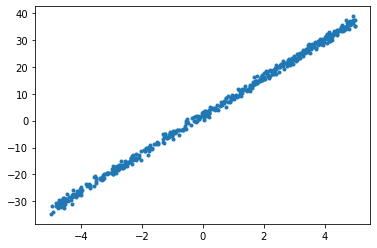

In [3]:
x = np.random.rand(500)*10 - 5
y = 7*x + 2 + np.random.randn(500)

plt.plot(x, y, 'o', ms=3)
plt.show()

[7.02378354 1.99872487]


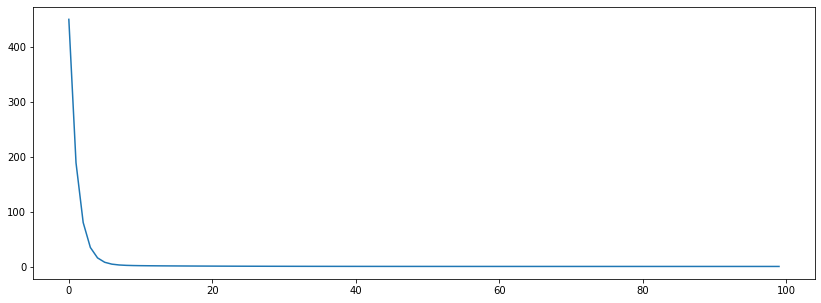

In [4]:
lr = 2e-2
X = np.stack((x, np.ones_like(x)), -1)
b = np.array([0.0, 0.0])

gd_error = []
for step in range(100):
    diff = y - X.dot(b)
    error = np.mean(diff**2)
    grad = -2 * (X.T * diff).mean(axis=1)
    b -= lr * grad
    gd_error.append(error)

print(b)
plt.figure(figsize=(14,5))
plt.plot(gd_error)
plt.show()

## Ⅱ. Stochastic Gradient Descent

SGD는 모든 데이터를 사용하여 업데이트를 하는 대신 하나 혹은 일부의 데이터를 가지고 업데이트를 한다. 때문에 목적식은 매 step마다 변하게 되고 이는 local minimum에서 탈출 확률을 높여주어 볼록이 아닌 목적식에도 적용 가능하게 한다. 또한 학습 속도나 리소스 관리 면에서도 GD보다 성능이 좋다.

$$
\theta^{\ t+1} \leftarrow \theta^{\ t} - \nabla_\theta \hat{\mathcal{L}} \quad \quad
\mathbb{E}[\nabla_\theta \hat{\mathcal{L}}] \approx \nabla_\theta \mathcal{L}
$$

[7.00530552 1.95984355]


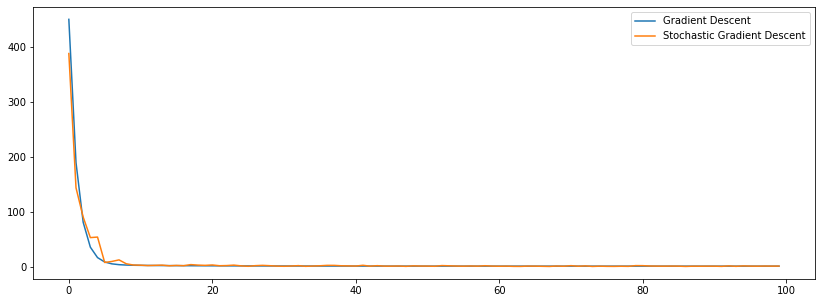

In [5]:
lr = 2e-2
X = np.stack((x, np.ones_like(x)), -1)
b = np.array([0.0, 0.0])

sgd_error = []
for step in range(100):
    batch_idx = np.random.choice(len(X), 10)
    X_batch, y_batch = X[batch_idx], y[batch_idx]
    diff = y_batch - X_batch.dot(b)
    error = np.mean(diff**2)
    grad = -2 * (X_batch.T * diff).mean(axis=1)
    b -= lr * grad
    sgd_error.append(error)

print(b)
plt.figure(figsize=(14,5))
plt.plot(gd_error, label='Gradient Descent')
plt.plot(sgd_error, label='Stochastic Gradient Descent')
plt.legend()
plt.show()